# POL280 Bayesian Modeling Homework 1

### Gento Kato (May 2, 2017)

---

## Q1
*Use the Gamma-Poisson conjugate speciﬁcation to analyze data on the number of presidential appointments from 1960 to 2000. The data are in the ﬁle called **appointments.dta** in the Dropbox folder.*

---

To start with, it is shown in the class that $gamma(\alpha, \beta)$ prior distribution and poisson likelihood produces $gamma(\alpha + \Sigma y, \beta + n)$ posterior distribution, as follows:  

* **Gamma (Prior) - Poisson (Likelihood) $\Rightarrow$ Gamma Posterior**

\begin{align}
\mbox{Prior Distribution} = \mbox{Gamma}(\alpha, \beta) &= \frac{\beta^{\alpha}}{\Gamma (\alpha)} \theta^{\alpha-1} e^{- \beta \theta} \\
\mbox{Poisson PMF } &= p(y | \theta) = \frac{e^{-\theta} \theta^{y_i}}{y_i !} \\
\mbox{Poisson Likelihood } &= \mathit{L}(\theta | y) = \hat{\Pi}_{i=1}^n \frac{e^{-\theta} \theta^{y_i}}{y_i !} \\
&= \frac{e^{-\theta n} \theta^{\sum_{i=1}^{n} y_i} }{y_1 ! y_2 ! \dots y_n !} \\
\mbox{Posterior Distribution } \pi(\theta | y) &\propto \frac{\beta^{\alpha}}{\Gamma (\alpha)} \theta^{\alpha-1} e^{- \beta \theta} \times \frac{e^{-\theta n} \theta^{\sum_{i=1}^{n} y_i} }{y_1 ! y_2 ! \dots y_n !} \\
&\propto \theta^{\alpha - 1 + \Sigma y} e^{- \theta (\beta + n)} \\
&\propto \mbox{Gamma }(\alpha + \Sigma y, \beta + n)
\end{align}

Now, the observed posterior value from <code>appointments.dta</code> can be extracted as follows:

In [94]:
library(foreign)
appdta <- read.dta("../data/POL280/appointments.dta") ## Open Data
y <- appdta$appoints ; y ## Store observed y

[1] 2 3 3 2 0 1 2 1 2 1

Then, using R function <code>rgamma(alpha, beta)</code>, we can create function to produce posterior distribution:

In [95]:
posterior <- function(sample, y, alpha, beta){
    n = length(y); sigmay = sum(y) 
    # n is y's sample size, sigmay is the sum of all y values
    return(rgamma(sample, alpha+sigmay, beta+n)) 
    # generate posterior distribution from prior's parameters
}

I will use the above function in Q3 and Q4.

## Q2
*The posterior distribution for $\theta$ is $gamma(\delta_1, \delta_2)$ according to some parameters $\delta_1$ and $\delta_2$, which of course depend on your choice of the parameters for the gamma prior. You should model $\theta$ using two sets of priors: one which speciﬁes a great deal of certainty regarding your best guess as to the value of $\theta$ and one that represents ignorance regarding this value. *

---

Before turning to the analysis, for the gamma distribution specification in Q1, the mean and variance of the distribution are defined as follows:

\begin{align}
Mean\left[gamma(\alpha, \beta)\right] &= \frac{\alpha}{\beta}\\
Var\left[gamma(\alpha, \beta)\right] &= \frac{\alpha}{\beta^2}\\
\end{align}

Now, suppose that there are two prior belief gamma distribution with the same mean (let's say 5), but different variance (certainty), as follows:

\begin{align}
\mbox{Prior 1 (ignorant): Mean } &= \frac{\alpha}{\beta} = \frac{5}{1} = 5 \\
\mbox{Variance } &= \frac{\alpha}{\beta^2} = \frac{5}{1} = 5\\
\mbox{Prior 2 (certain): Mean } &= \frac{\alpha}{\beta} = \frac{50}{10} = 5 \\
\mbox{Variance } &= \frac{\alpha}{\beta^2} = \frac{50}{100} = \frac{1}{2}
\end{align}

We can generate those two prior distributions in R as follows

In [ ]:
## Set Alpha and Betas
a1 = 5; b1 = 1 ## Ignorant
a2 = 50; b2 = 10 ## Certain

## Generate Prior distribution
set.seed(27674) # Make this replicable
prior1 <- rgamma(10000, a1, b1) # Ignorant
prior2 <- rgamma(10000, a2, b2) # Certain

## Check Result
paste("For prior 1, mean is ", round(mean(prior1),2), 
      ", variance is ", round(var(prior1),2))
paste("For prior 2, mean is ", round(mean(prior2),2), 
      ", variance is ", round(var(prior2),2))

Now, the above two distributions can be plotted as follows:

In [103]:
library(ggplot2);
source("https://raw.githubusercontent.com/gentok/Method_Notes/master/sources/gktheme.R")

bayesdata <- data.frame(prior1 = prior1, prior2 = prior2) 

## Plot Result ##
bgraph <- ggplot(bayesdata) + gktheme +
    geom_density(aes(prior1, fill="1"), alpha = 0.5, size=0.5) +   
    geom_density(aes(prior2, fill="2"), alpha = 0.5, size=0.5) +   
    scale_y_continuous(limits=c(0,0.6),breaks=c(0,0.2,0.4,0.6))+
    scale_x_continuous(limits=c(0,16.03),breaks=c(0,2.5,5,7.5,10,12.5,15))+
    scale_linetype_manual(name="Gamma Parameters",values=c(1,2), 
      labels = c(expression(paste("1. Ignorant: ", alpha == 5, "; " , beta == 1)),
                 expression(paste("2. Certain: ", alpha == 50, "; " , beta == 10))))+
    scale_fill_manual(name="Gamma Parameters",values=c(1,2), 
      labels = c(expression(paste("1. Ignorant: ", alpha == 5, "; " , beta == 1)),
                 expression(paste("2. Certain: ", alpha == 50, "; " , beta == 10))))+
    xlab("Prior Belief")+
    ylab("Density")+
    ggtitle("Prior Distributions by Different Parameters")+
    theme(legend.position = "right")

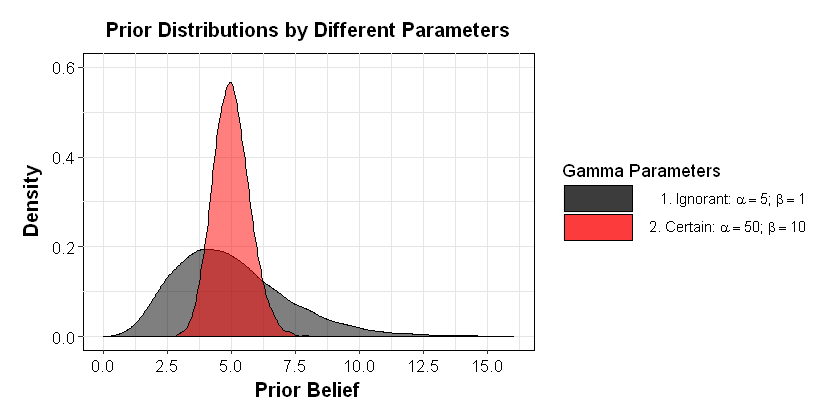

In [104]:
options(repr.plot.width=7, repr.plot.height=3.5)
bgraph

## Q3
*Generate a large number of values from this distribution in **R**, say 10, 000 or so, using the command:*

**posterior.sample <- rgamma(10000,d1,d2)**

---

Note that in Q1, I created following objects:

 * <code>y</code> variable, which is number of appointments by each president.
 * <code>posterior</code> function, to generate posterior distribution from gamma prior parameters and poisson likelihood
 
<code>posterior</code> function utilizes <code>rgamma</code>, so those two functions are essentially the same. Therefore, I use <code>posterior</code> function to generate posterior distribution, as follows:

In [98]:
set.seed(8900786) # Make this replicable
#posterior(y, alpha, beta) ## Alpha and Beta from prior distribution
posterior1 <- posterior(10000, y, a1, b1)
posterior2 <- posterior(10000, y, a2, b2)

## Q4

Summarize the posteriors with quantities of interest such as means, medians, and
variances. Also supply plots of the density of the posterior distributions.

---

Before starting the analysis, note that mean, median and variance of observed y is shown as follows:

In [99]:
paste("For observed y, mean is ", round(mean(y),2), 
      ", median is ", round(median(y),2), 
      ", variance is ", round(var(y),2))

[1] "For observed y, mean is  1.7 , median is  2 , variance is  0.9"

Now the characteristics of posterior distribution can be extracted as follows:

In [100]:
## Check Result
paste("For posterior 1, mean is ", round(mean(posterior1),2), 
      ", median is ", round(median(posterior1),2), 
      ", variance is ", round(var(posterior1),2))
paste("For posterior 2, mean is ", round(mean(posterior2),2), 
      ", median is ", round(median(posterior2),2), 
      ", variance is ", round(var(posterior2),2))

[1] "For posterior 1, mean is  2 , median is  1.96 , variance is  0.18"

[1] "For posterior 2, mean is  3.35 , median is  3.33 , variance is  0.17"

From the above result, the mean of posterior distrbution from more ignorant prior distribution (i.e., prior 1) is more strongly pulled by the observed y values than the mean of posterior distibution from certain prior distributon (i.e., prior 2). In other words, posterior distribution 1 has closer mean (i.e., mean is 2) to observed y (i.e., mean is 1.7) than posterior distribution 2 (i.e, mean is 3.35). The observed y has stronger influence on ignorant (high variance) prior belief than on certain (low variance) prior belief. Note that the variance for two posterior distributions are identical.

Now the Result can be plotted as follows:

In [105]:
bayesdata$posterior1 <- posterior1 
bayesdata$posterior2 <- posterior2

## Plot Result ##
bgraph2 <- ggplot(bayesdata) + gktheme +
    geom_density(aes(posterior1, fill="1"), alpha = 0.5, size=0.5) +   
    geom_density(aes(posterior2, fill="2"), alpha = 0.5, size=0.5) +   
    scale_y_continuous(limits=c(0,1),breaks=c(0,0.25,0.5,0.75,1))+
    scale_x_continuous(limits=c(0,6),breaks=c(0,1,2,3,4,5,6))+
    scale_linetype_manual(name="Gamma Prior Parameters",values=c(1,2), 
      labels = c(expression(paste("1. Ignorant: ", alpha == 5, "; " , beta == 1)),
                 expression(paste("2. Certain: ", alpha == 50, "; " , beta == 10))))+
    scale_fill_manual(name="Gamma Prior Parameters",values=c(1,2), 
      labels = c(expression(paste("1. Ignorant: ", alpha == 5, "; " , beta == 1)),
                 expression(paste("2. Certain: ", alpha == 50, "; " , beta == 10))))+
    xlab("Posterior Belief")+
    ylab("Density")+
    ggtitle("Posterior Distributions by Prior Parameters")+
    theme(legend.position = "right")

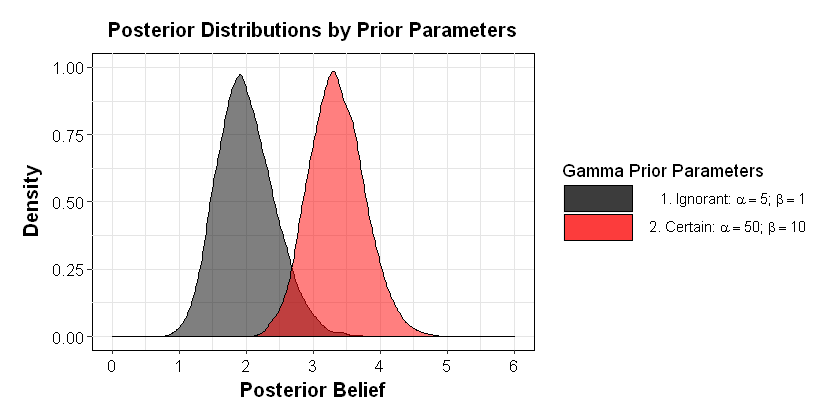

In [106]:
options(repr.plot.width=7, repr.plot.height=3.5)
bgraph2

The above plot further confirmes the implication. While the shape of two posterior distributions are almost identical, the posterior distribution for ignorant prior is placed left of the posterior distribution for certain prior. Given that both prior distribution had the same mean of 5, ignorant prior holders are more strongly pulled by the observation of y (mean of 2) than certain prior holders. 